In [56]:
# Importing dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Calling all csv files related to organ and survival rate 

survival_by_type= pd.read_csv('Resources/survival_donor_type_df.csv')
survival_by_age= pd.read_csv('Resources/survival_age_df.csv')
survival_by_diagnoses= pd.read_csv('Resources/survival_diagnose_df.csv')
cPRA_scores= pd.read_csv('Resources/clean_cPRA.csv').drop(columns=['Med. Center', 'Unnamed: 0'])

med_centers= pd.read_csv('Resources/latLong.csv').drop(columns=['All Centers Hospital Name', 'Address', 'Unnamed: 5',
                                                      'lat/long', 'Hospital Name'])

# med_centers.head()
# survival_by_age.head()
# cPRA_scores.head()
# survival_by_type.head()
# survival_by_diagnoses.head()


# survival_by_type.Organ.unique()
# print(len(cost_by_type))
# print(len(survival_by_diagnoses))
# print(len(survival_by_age))

### Data joining

In [58]:
# Merging, joining, and filtering data for final combined DataFrame

survival_df= pd.merge(survival_by_age, survival_by_diagnoses, on='Organ', how='inner')
survival_df
joined_df= survival_df.join(cPRA_scores)
# joined_df

filtered_df= joined_df.drop(columns= ['_id_x', 'Region_x','_id_y', 'Region_y'])
filtered_df
filtered_df['Years_Post_Transplant_x'] = filtered_df['Years_Post_Transplant_x'].str.replace(r'Year', '').astype(float)
filtered_df['Years_Post_Transplant_y'] = filtered_df['Years_Post_Transplant_y'].str.replace(r'Year', '').astype(float)
# filtered_df.Organ.unique()

main_df= filtered_df.copy()
main_df=main_df.dropna()
main_df.head()

,Organ,Recipient_Age,Years_Post_Transplant_x,Number_Functioning_or_Alive_x,Survival_Rate_x,Recipient_Diagnose_Category,Years_Post_Transplant_y,Number_Functioning_or_Alive_y,Survival_Rate_y,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart
0,Heart,< 1 Year,1.0,405,87.4,Valvular Heart Disease,1.0,110,91.0,0,9,0.0,0.0,0.0,0.0
1,Heart,< 1 Year,1.0,405,87.4,Retransplant/Graft Failure,5.0,224,68.3,20-79,1,0.0,0.0,0.0,0.0
2,Heart,< 1 Year,1.0,405,87.4,Cardiomyopathy,1.0,5035,92.0,98-100,5,0.0,0.0,0.0,0.0
3,Heart,< 1 Year,1.0,405,87.4,Cardiomyopathy,3.0,4183,87.1,0,622,0.0,3.0,7.0,0.0
4,Heart,< 1 Year,1.0,405,87.4,Valvular Heart Disease,3.0,108,88.7,1-19,46,0.0,0.0,0.0,0.0


In [59]:
# Renaming columns and finding the averages and sums for certain columns to condense. 

main_df['Survival Rate'] =  main_df[['Survival_Rate_x', 'Survival_Rate_y']].mean(axis=1)
main_df['Years Post Transplant'] = main_df[['Years_Post_Transplant_y', 'Years_Post_Transplant_x']].mean(axis=1)
main_df['Number Functioning or Alive'] = main_df["Number_Functioning_or_Alive_y"] + main_df["Number_Functioning_or_Alive_x"]

final_df= main_df.drop(columns=['Survival_Rate_y', 'Survival_Rate_x', 'Number_Functioning_or_Alive_x', 
                          'Number_Functioning_or_Alive_y','Years_Post_Transplant_x', 'Years_Post_Transplant_y'])

final_df

,Organ,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Survival Rate,Years Post Transplant,Number Functioning or Alive
0,Heart,< 1 Year,Valvular Heart Disease,0,9,0.0,0.0,0.0,0.0,89.20,1.0,515
1,Heart,< 1 Year,Retransplant/Graft Failure,20-79,1,0.0,0.0,0.0,0.0,77.85,3.0,629
2,Heart,< 1 Year,Cardiomyopathy,98-100,5,0.0,0.0,0.0,0.0,89.70,1.0,5440
3,Heart,< 1 Year,Cardiomyopathy,0,622,0.0,3.0,7.0,0.0,87.25,2.0,4588
4,Heart,< 1 Year,Valvular Heart Disease,1-19,46,0.0,0.0,0.0,0.0,88.05,2.0,513
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Liver,6-10 Years,Non-Cholestatic Cirrhosis,0,19,0.0,0.0,0.0,0.0,87.80,2.0,7850
1147,Liver,6-10 Years,Other,1-19,10,0.0,0.0,0.0,0.0,84.00,2.0,747
1148,Liver,6-10 Years,Acute Hepatic Necrosis,20-79,10,0.0,0.0,0.0,0.0,85.80,3.0,1125
1149,Liver,6-10 Years,Cystic Fibrosis,80-97,1,0.0,0.0,0.0,0.0,90.80,1.0,321


### Assigning X and y

In [60]:

# joined_df.groupby(by= ['Survival_Rate'], dropna= False)

X= final_df.drop(columns='Organ')
y= pd.DataFrame(final_df['Organ'].values.reshape(-1,1))
 
y
# X.head()

,0
0,Heart
1,Heart
2,Heart
3,Heart
4,Heart
...,...
1146,Liver
1147,Liver
1148,Liver
1149,Liver


In [61]:
pd.value_counts(y[0], normalize = True)

Kidney               0.492615
Heart                0.354474
Kidney / Pancreas    0.078193
Liver                0.074718
Name: 0, dtype: float64

In [62]:
print(X.shape, y.shape)
# X.dtypes

(1151, 11) (1151, 1)


### Splitting test and training data 

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_test.shape, y_test.shape)
X_train
# y_train.head()

(380, 11) (380, 1)


,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Survival Rate,Years Post Transplant,Number Functioning or Alive
1092,< 1 Year,Other Liver Disease,0,27,0.0,0.0,0.0,0.0,85.15,2.0,731
249,50-64 Years,Congenital Heart Disease,80-97,32,0.0,0.0,0.0,0.0,76.80,3.0,3384
822,6-10 Years,Other,20-79,49,0.0,0.0,0.0,0.0,92.80,3.0,4433
534,35-49 Years,Glomerular Disease,1-19,13,0.0,0.0,0.0,0.0,94.00,3.0,28490
71,18-34 Years,Cardiomyopathy,80-97,24,0.0,0.0,1.0,0.0,89.00,2.0,5021
...,...,...,...,...,...,...,...,...,...,...,...
1044,18-34 Years,Glomerular Disease,20-79,42,0.0,0.0,0.0,0.0,87.65,4.0,497
1095,1-5 Years,Malignant Neoplasms,80-97,2,0.0,0.0,0.0,0.0,84.50,2.0,5555
1130,6-10 Years,Other Liver Disease,98-100,32,0.0,0.0,1.0,0.0,82.25,3.0,524
860,11-17 Years,Neoplasms,20-79,132,0.0,3.0,5.0,0.0,81.75,5.0,1452


In [64]:
y_pred = ['pass'] * len(X_test)
y_pred = pd.DataFrame(data = y_pred,
                      index = X_test.index.values,
                      columns = [0])
y_pred.head()

,0
174,pass
752,pass
467,pass
240,pass
667,pass


In [65]:
# Changing format of X and y to numerical values to avoid conflict downstream.

X_train_numerical = X_train.select_dtypes(
                         include = np.number).copy()
X_train_numerical_indices = X_train_numerical.index.values
y_train_numerical = y_train[y_train.index. \
                                    isin(X_train_numerical_indices)]
y_train_numerical


,0
1092,Liver
249,Heart
822,Kidney
534,Kidney
71,Heart
...,...
1044,Kidney / Pancreas
1095,Liver
1130,Liver
860,Kidney


### DecisionTreeClassifier()

In [66]:
# Decision Tree classifier and score

clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, 
                            X_train_numerical, y_train_numerical,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.80933852, 0.80933852, 0.79766537])

In [67]:
# Classifying and fitting y prediction with X_test using DecisionTreeClassifier()

clf.fit(X_train_numerical, y_train_numerical)

X_test_numerical = X_test.select_dtypes(include = np.number).copy()

y_pred = clf.predict(X_test_numerical)
y_pred = pd.DataFrame(data = y_pred, 
                      index = X_test_numerical.index.values,
                      columns = ['Organ'])

y_pred
# X_test_numerical


,Organ
174,Liver
752,Kidney
467,Kidney
240,Heart
667,Kidney
...,...
899,Kidney
1033,Kidney
305,Heart
411,Kidney / Pancreas


### Splitting data again with numerical X and y 

In [70]:
y2= pd.get_dummies(y_train).values.astype(float)
X2= pd.get_dummies(X_train).values


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size = 0.33, random_state = 42)
print(X_train.shape, y_train.shape)
# y_test

(516, 272) (516, 4)


In [72]:
# Using RandomForestRegressor model and seeing if scores improve.

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f"RandomForestRegressor model score for training data: {rfr.score(X_train, y_train)}")
print(f"RandomForestRegressor model score for testing data: {rfr.score(X_test, y_test)}")
print(f"Compared to DecisionTreeClassifier model score for training data: {cv_score}")
# y_train_array

print(X_train.shape, y_train.shape)
# y_train.dtypes.astype(int)

RandomForestRegressor model score for training data: 0.9664232176956014
RandomForestRegressor model score for testing data: 0.7981843184484012
Compared to DecisionTreeClassifier model score for training data: [0.80933852 0.80933852 0.79766537]
(516, 272) (516, 4)


### GridSearch

##### cv = 3 will split our data into 3 equal parts.
##### Uses two of them for training the RandomForest classifier, and test with the remaining data.
##### Keeps going until all combinations are exhausted.


In [73]:
# Using GridSearch to find the important features in data.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [15, 25, 35],
    'max_depth': [6, 10, 20, 30]
}

gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=10)

gridsearch.fit(X_train, y_train)




Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=6, n_estimators=15 ....................................
[CV]  max_depth=6, n_estimators=15, score=(train=0.674, test=0.599), total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=6, n_estimators=15, score=(train=0.701, test=0.605), total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV]  max_depth=6, n_estimators=15, score=(train=0.721, test=0.703), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=(train=0.741, test=0.692), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=6, n_estimators=25, score=(train=0.744, test=0.674), total=   0.1s
[CV] max_depth=6, n_estimators=25 ....................................
[CV]  max_depth=6, n_estimators=25, score=(train=0.689, test=0.692), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=6, n_estimators=35, score=(train=0.721, test=0.657), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................
[CV]  max_depth=6, n_estimators=35, score=(train=0.788, test=0.715), total=   0.1s
[CV] max_depth=6, n_estimators=35 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=6, n_estimators=35, score=(train=0.747, test=0.715), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV]  max_depth=10, n_estimators=15, score=(train=0.817, test=0.738), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................
[CV]  max_depth=10, n_estimators=15, score=(train=0.820, test=0.750), total=   0.1s
[CV] max_depth=10, n_estimators=15 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=10, n_estimators=15, score=(train=0.802, test=0.756), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.805, test=0.715), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.858, test=0.756), total=   0.1s
[CV] max_depth=10, n_estimators=25 ...................................
[CV]  max_depth=10, n_estimators=25, score=(train=0.828, test=0.750), total=   0.1s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.840, test=0.773), total=   0.1s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.843, test=0.756), total=   0.1s
[CV] max_depth=10, n_estimators=35 ...................................
[CV]  max_depth=10, n_estimators=35, score=(train=0.826, test=0.750), 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.3s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30],
                         'n_estimators': [15, 25, 35]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [75]:
# Gridsearch results ranked by best test scores and finding the average of split test/train scores.

gridsearch_summary= pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')
gridsearch_summary.head()
gridsearch_summary['Average Split Test Score'] = gridsearch_summary[["split0_test_score", "split1_test_score", "split2_test_score"]].mean(axis=1)
gridsearch_summary['Average Split Train Score'] = gridsearch_summary[["split0_train_score", "split1_train_score", "split2_train_score"]].mean(axis=1)

gridsearch_summary.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,Average Split Test Score,Average Split Train Score
11,0.112387,0.025145,0.019141,0.005160,30,35,"{'max_depth': 30, 'n_estimators': 35}",0.860465,0.848837,0.843023,0.850775,0.007251,1,1.000000,1.000000,1.000000,1.000000,0.000000,0.850775,1.000000
6,0.052671,0.007200,0.007862,0.000713,20,15,"{'max_depth': 20, 'n_estimators': 15}",0.866279,0.831395,0.808140,0.835271,0.023893,2,0.994186,0.985465,0.982558,0.987403,0.004941,0.835271,0.987403
7,0.068667,0.007655,0.011673,0.002088,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.854651,0.784884,0.837209,0.825581,0.029645,3,0.994186,0.982558,0.988372,0.988372,0.004747,0.825581,0.988372
9,0.056242,0.010856,0.008562,0.000783,30,15,"{'max_depth': 30, 'n_estimators': 15}",0.837209,0.854651,0.784884,0.825581,0.029645,3,0.994186,0.997093,0.994186,0.995155,0.001370,0.825581,0.995155
10,0.099748,0.010494,0.017136,0.004028,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.854651,0.808140,0.802326,0.821705,0.023417,5,0.997093,0.994186,1.000000,0.997093,0.002374,0.821705,0.997093


<ipython-input-76-7f224e205ebf>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gridsearch_summary.hist(ax = ax, rwidth=2.0)


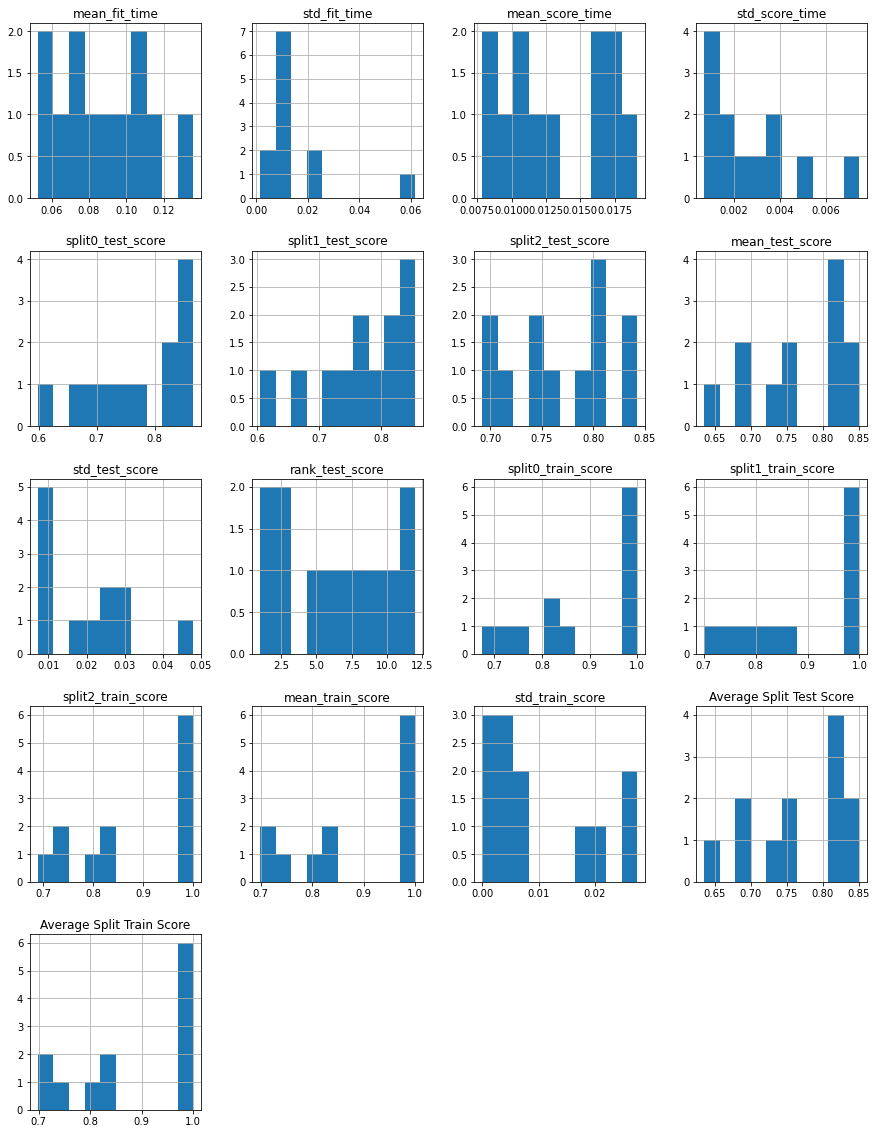

In [76]:
# From the shape of the bins, observe whether an attribute is Gaussian’, skewed or has exponential distribution.

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gridsearch_summary.hist(ax = ax, rwidth=2.0)

plt.show()

### RandomForestClassifier best features

/Users/yaden/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


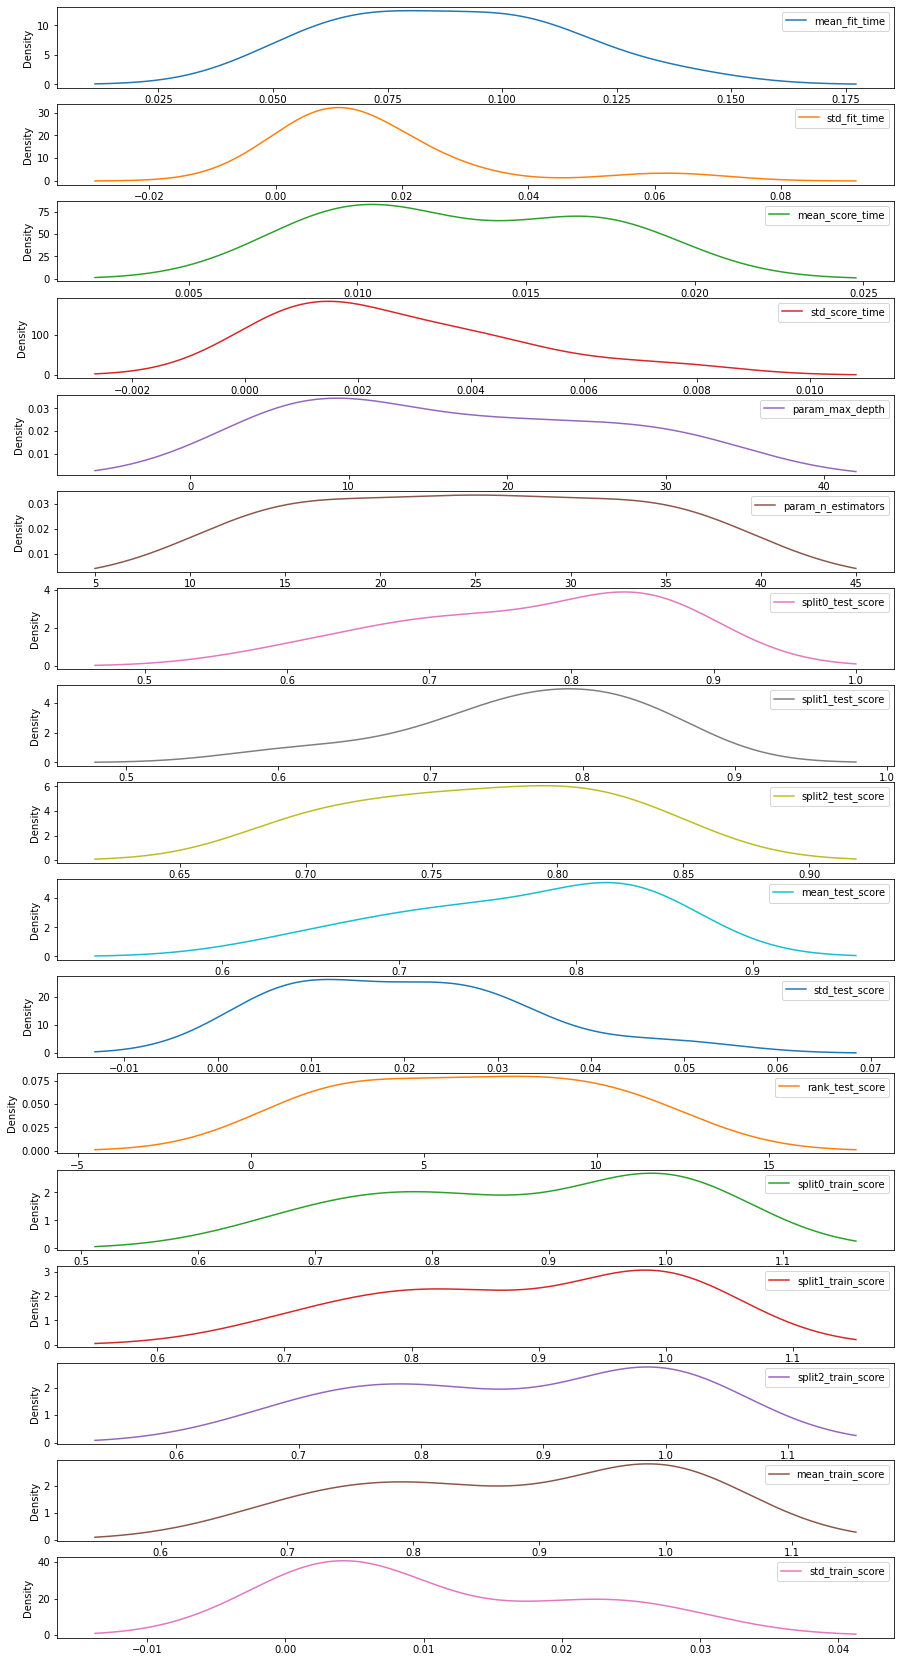

In [79]:
# Grabbing best parameters from RandomForestClassifier model and showing distribution of each attribute.

RandomForestClassifier().get_params().keys()
gridsearch_df= pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')

gridsearch_df= gridsearch_df.copy()

# Univariate Density Plots
# Shows distribution of each area

fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(111)
gridsearch_df.plot(kind='density', subplots=True, ax=ax)

plt.show()


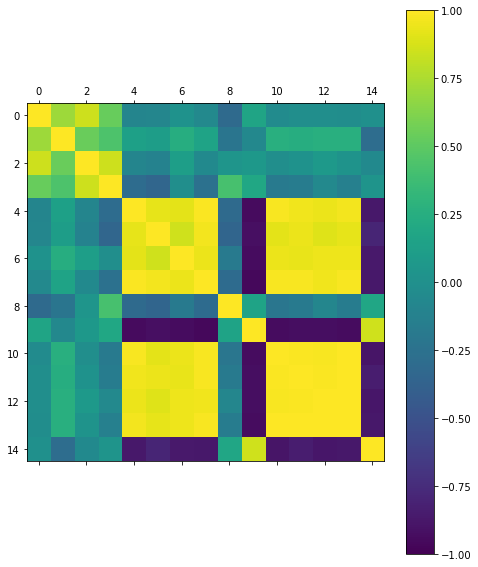

In [80]:
# Matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. 
# Each variable is perfectly positively correlated with each other in the diagonal line from top left to bottom right.
# If two variables change in the same direction they are positively correlated.

# Correlation Matrix Plot

correlations = gridsearch_df.corr()
# plot correlation matrix
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)

plt.show()

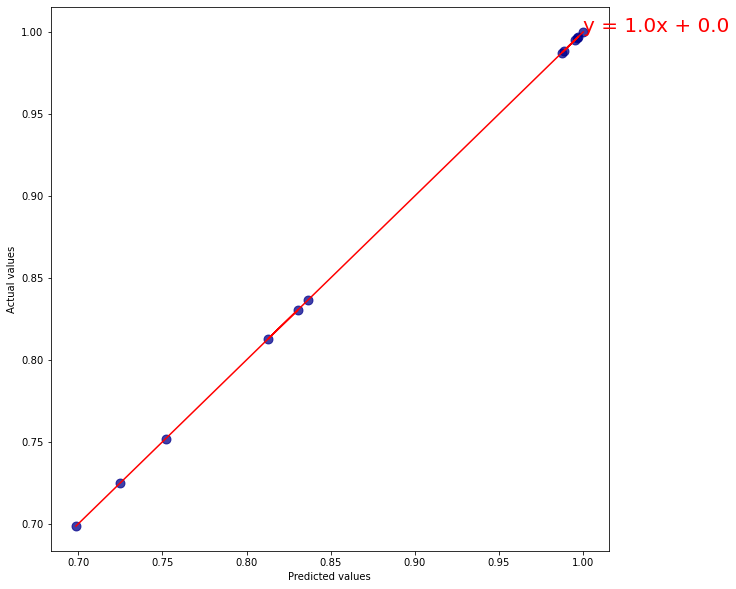

In [125]:
# Displaying both averages of split test/train data, majority of scores close to ~ 1.0 except for a few outliers
import seaborn as sns
from scipy.stats import linregress

gridsearch_df['Average Split Test Score'] = gridsearch_df[["split0_test_score", "split1_test_score", "split2_test_score"]].mean(axis=1)
gridsearch_df['Average Split Train Score'] = gridsearch_df[["split0_train_score", "split1_train_score", "split2_train_score"]].mean(axis=1)
# gridsearch_df.head()

fig = plt.figure(figsize = (10,10))
ax = fig.gca()

grid_plot= gridsearch_df.plot.scatter(x= 'Average Split Train Score',
                      y= 'Average Split Train Score',
                      c='DarkBlue', ax=ax, alpha=0.75, s=80)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


x_values= gridsearch_df['Average Split Train Score']
y_values= gridsearch_df['Average Split Train Score']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=20,color="red")

# # sns.lmplot(x=x, y=y, data=gridsearch_df)

plt.show()

In [227]:
# type(RandomForestClassifier)

## LinearRegression model


In [234]:
from sklearn.linear_model import LinearRegression

X_train_numerical.columns= range(X_train_numerical.shape[1])
# y_train_numerical.columns= 
# X_train_numerical
model = LinearRegression()
model.fit(X_train, y_train)
# # X_train_numerical


LinearRegression()

In [238]:


training_score = model.score(X_train, y_train)*100
testing_score = model.score(X_test, y_test)*100

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 30.690795729647046
Testing Score: 32.98383022022819


In [243]:
# Calculating the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use model to make predictions
y_predicted = model.predict(X_test)

# Score predictions with mse and r2
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# print(f"Slope: ", model.coef_)
# # print('Intercept: ', model.intercept_)
print(f"Root mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2 ): {r2}")
# # 


Root mean Squared Error (MSE): 0.08770734355891799
R-squared (R2 ): 0.32983830220228194


In [244]:
model.score(X_test, y_test)

0.32983830220228194

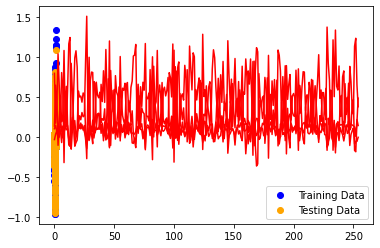

In [249]:
# Plotting testing and training predictions for LinearRegression model and realized there is no linear correlation.

train_predict= plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
test_predict= plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()

# plt.scatter(X_test_scaled, y_test_scaled, s=5)
plt.plot(y_predicted, color='r')
plt.show()
